In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import sys
sys.path.append('../src')
from data.preprocessing import EnhancedTextPreprocessor

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

c:\Sentiment_analysis\notebooks\../src\data\dataset.py:611: UserWarning: Windows detected: Setting default num_workers=0 for DataLoader to avoid multiprocessing issues. You can override this in create_data_loaders() if needed.
  warnings.warn(


In [2]:
df = pd.read_csv('../data/raw/sentiment_dataset.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (31232, 4)

First few rows:


,id,text,label,sentiment
0,0,"Cooking microwave pizzas, yummy",2,positive
1,1,Any plans of allowing sub tasks to show up in ...,1,neutral
2,2,"I love the humor, I just reworded it. Like sa...",2,positive
3,3,naw idk what ur talkin about,1,neutral
4,4,That sucks to hear. I hate days like that,0,negative


In [3]:
print("Dataset Info:")
df.info()
print("\nClass Distribution:")
print(df['sentiment'].value_counts())
print("\nClass Distribution (%):")
print(df['sentiment'].value_counts(normalize=True) * 100)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31232 entries, 0 to 31231
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         31232 non-null  int64 
 1   text       31232 non-null  object
 2   label      31232 non-null  int64 
 3   sentiment  31232 non-null  object
dtypes: int64(2), object(2)
memory usage: 976.1+ KB

Class Distribution:
sentiment
neutral     11649
positive    10478
negative     9105
Name: count, dtype: int64

Class Distribution (%):
sentiment
neutral     37.298284
positive    33.548924
negative    29.152792
Name: proportion, dtype: float64


Text Length Statistics:
count    31232.000000
mean        18.025166
std         17.843542
min          1.000000
25%          8.000000
50%         13.000000
75%         21.000000
max        391.000000
Name: text_length, dtype: float64


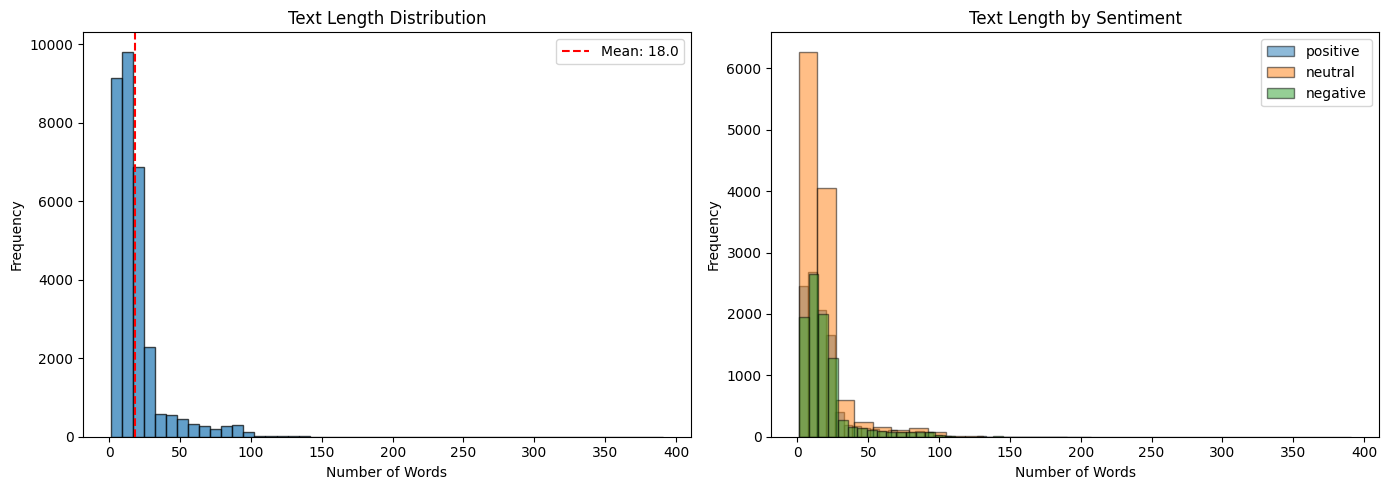

In [4]:
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
df['char_length'] = df['text'].apply(lambda x: len(str(x)))

print("Text Length Statistics:")
print(df['text_length'].describe())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(df['text_length'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Number of Words')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Text Length Distribution')
axes[0].axvline(df['text_length'].mean(), color='r', linestyle='--', label=f'Mean: {df["text_length"].mean():.1f}')
axes[0].legend()

for sentiment in df['sentiment'].unique():
    subset = df[df['sentiment'] == sentiment]['text_length']
    axes[1].hist(subset, bins=30, alpha=0.5, label=sentiment, edgecolor='black')
axes[1].set_xlabel('Number of Words')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Text Length by Sentiment')
axes[1].legend()
plt.tight_layout()
plt.show()

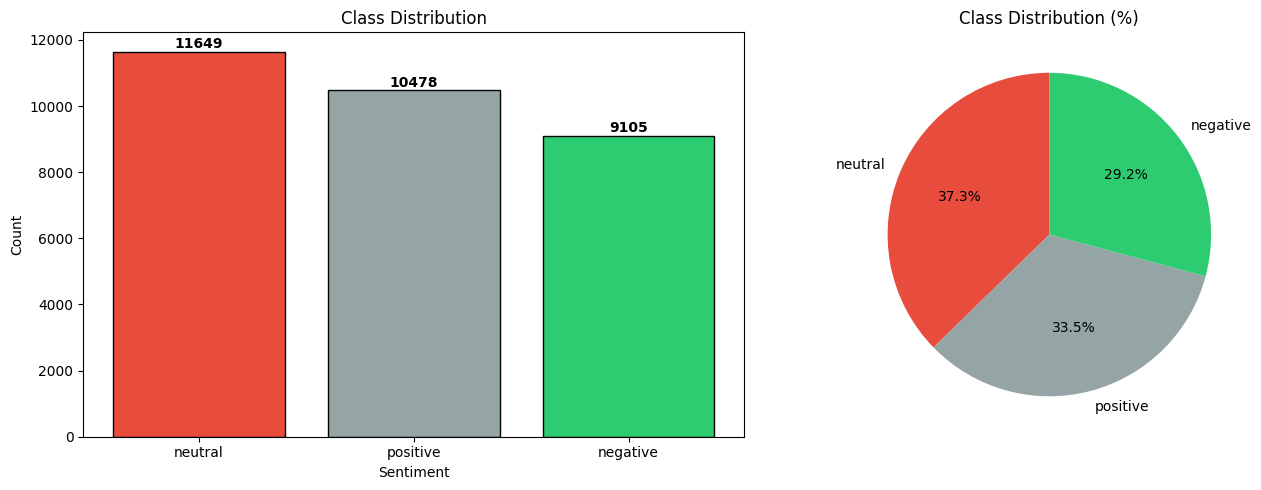

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sentiment_counts = df['sentiment'].value_counts()
colors = ['#e74c3c', '#95a5a6', '#2ecc71']
axes[0].bar(sentiment_counts.index, sentiment_counts.values, color=colors, edgecolor='black')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Count')
axes[0].set_title('Class Distribution')
for i, v in enumerate(sentiment_counts.values):
    axes[0].text(i, v + 100, str(v), ha='center', fontweight='bold')

axes[1].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
           colors=colors, startangle=90)
axes[1].set_title('Class Distribution (%)')
plt.tight_layout()
plt.show()

In [10]:
preprocessor = EnhancedTextPreprocessor()
vader_scores = []
for text in df['text']:
    scores = preprocessor.compute_vader_features(text)
    vader_scores.append(scores)

vader_df = pd.DataFrame(vader_scores, columns=['compound', 'pos', 'neu', 'neg'])
df_with_vader = pd.concat([df.reset_index(drop=True), vader_df], axis=1)

print("VADER Score Statistics:")
print(vader_df.describe())

VADER Score Statistics:
           compound           pos           neu           neg
count  31232.000000  31232.000000  31232.000000  31232.000000
mean       0.203680      0.174402      0.746777      0.078819
std        0.478485      0.193775      0.201051      0.134027
min       -0.978800      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.622000      0.000000
50%        0.177900      0.129000      0.760000      0.000000
75%        0.624900      0.285000      0.905000      0.123000
max        0.998800      1.000000      1.000000      1.000000


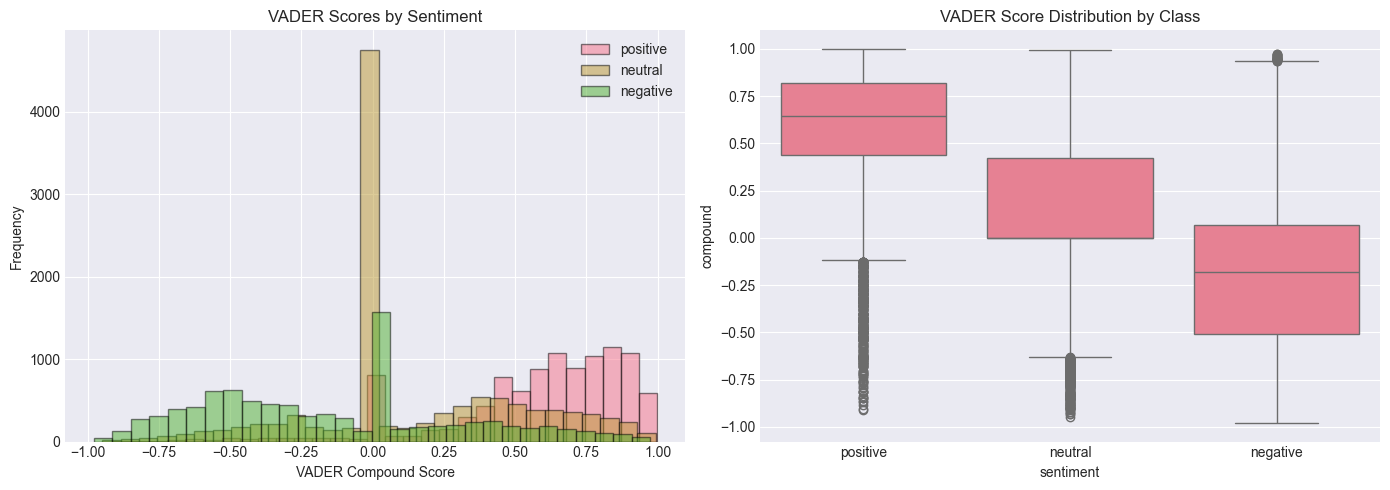

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for sentiment in df['sentiment'].unique():
    subset = df_with_vader[df_with_vader['sentiment'] == sentiment]['compound']
    axes[0].hist(subset, bins=30, alpha=0.5, label=sentiment, edgecolor='black')
axes[0].set_xlabel('VADER Compound Score')
axes[0].set_ylabel('Frequency')
axes[0].set_title('VADER Scores by Sentiment')
axes[0].legend()

sns.boxplot(data=df_with_vader, x='sentiment', y='compound', ax=axes[1])
axes[1].set_title('VADER Score Distribution by Class')
plt.tight_layout()
plt.show()


In [12]:
print("SAMPLE TEXTS BY SENTIMENT")
print("="*80)
for sentiment in df['sentiment'].unique():
    print(f"\n{sentiment.upper()} Examples:")
    samples = df[df['sentiment'] == sentiment].sample(n=3, random_state=42)
    for idx, row in samples.iterrows():
        print(f"  - {row['text']}")

SAMPLE TEXTS BY SENTIMENT

POSITIVE Examples:
  -   the cokies arnt real imaginary will hav to do mmmmmmmmmmmm cookie...
  - This is a much better tool than some I have come across http://www.tweepular.com - Twitter Karma on Steroids
  - I'm only two weeks in and purchased premium and killing it (even more than usual) at work. I love this program! I mostly use it on my desktop but it's great for when I think of things after hours, am on the road with my boss or walking out he office door and someone throws something my way I need to remember.

NEUTRAL Examples:
  - ? American Pie FOREVER. I`m watching it right now. They`re running naked around on the Streets! Would you do that? I would  [ NOT ]
  - I suggest you add sub-tasks feature
  - Our Christian mobile directory is running! Just a month old  Visit http://tiny.cc/caribdir

NEGATIVE Examples:
  - thinks that the limit of 140 letters is really not fair. 300 + would be better
  - getting ready for school.. reading what`s going on on 

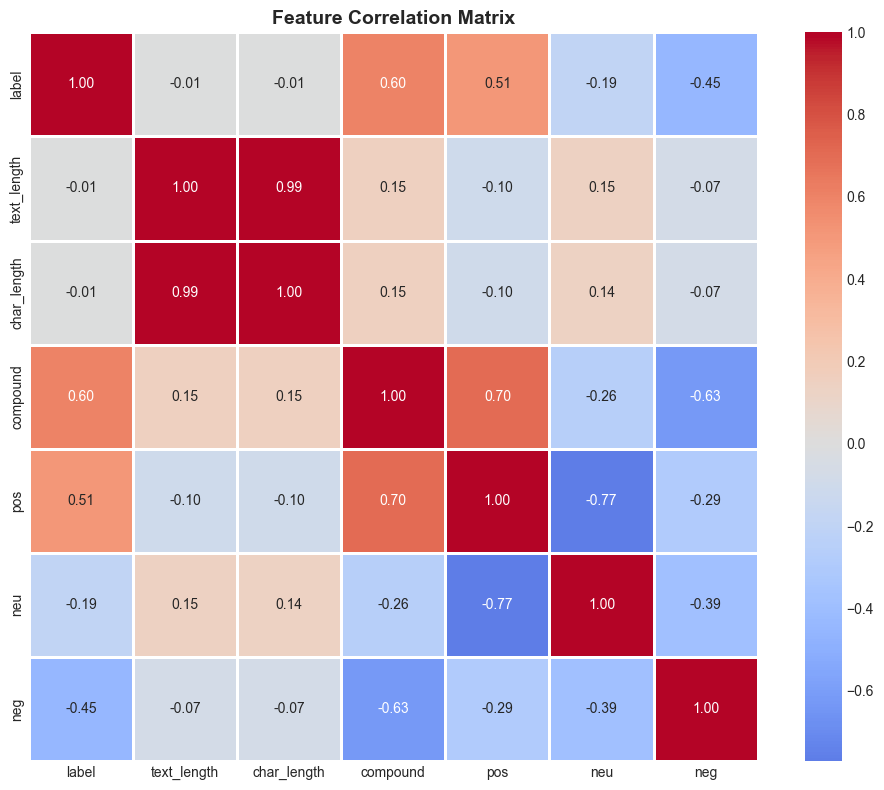

In [13]:
corr_data = df_with_vader[['label', 'text_length', 'char_length', 'compound', 'pos', 'neu', 'neg']]
correlation_matrix = corr_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
           square=True, linewidths=1, fmt='.2f')
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


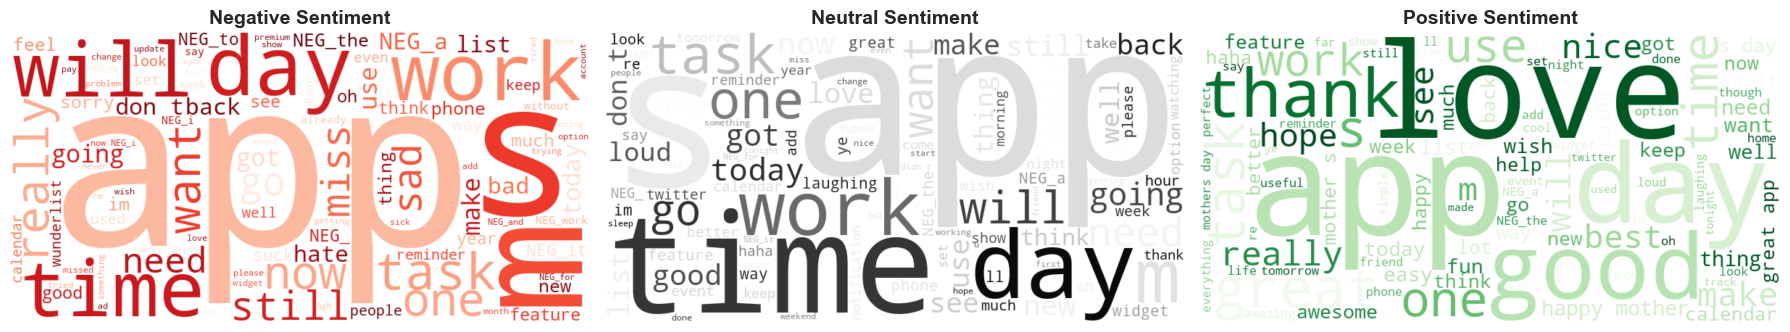

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sentiments = ['negative', 'neutral', 'positive']
colors_map = ['Reds', 'Greys', 'Greens']

for idx, sentiment in enumerate(sentiments):
    texts = df[df['sentiment'] == sentiment]['text'].values
    cleaned_texts = [preprocessor.clean_text(text) for text in texts]
    all_text = ' '.join(cleaned_texts)
    
    wordcloud = WordCloud(
        width=800, height=400,
        background_color='white',
        colormap=colors_map[idx],
        max_words=100
    ).generate(all_text)
    
    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].axis('off')
    axes[idx].set_title(f'{sentiment.capitalize()} Sentiment', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()